route [(0, 0), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (6, 4), (7, 5), (6, 6), (7, 7)]
cost 11


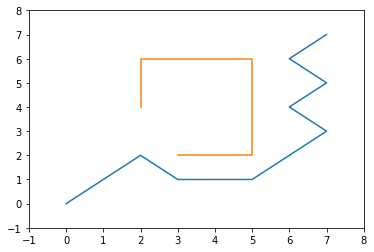

In [3]:
from __future__ import print_function
import matplotlib.pyplot as plt
 
class AStarGraph(object):

 
    def __init__(self):
        self.barriers = []
        self.barriers.append([(2,4),(2,5),(2,6),(3,6),(4,6),(5,6),(5,5),(5,4),(5,3),(5,2),(4,2),(3,2)])
 
    def heuristic(self, start, goal):

            B = 1
            B2 = 1
            dx = abs(start[0] - goal[0])
            dy = abs(start[1] - goal[1])
            return B * (dx + dy) + (B2 - 2 * B) * min(dx, dy)
 
    def get_vertex_neighbours(self, pos):
            n = []
            
            for dx, dy in [(1,0),(-1,0),(0,1),(0,-1),(1,1),(-1,1),(1,-1),(-1,-1)]:
                x2 = pos[0] + dx
                y2 = pos[1] + dy
                if x2 < 0 or x2 > 7 or y2 < 0 or y2 > 7:
                    continue
                n.append((x2, y2))
            return n
 
    def move_cost(self, a, b):
            for barrier in self.barriers:
                if b in barrier:
                    return 100
            return 1 
 
def AStarSearch(start, end, graph):
 
        G = {}
        F = {} 

        
        G[start] = 0 
        F[start] = graph.heuristic(start, end)

        closedVertices = set()
        openVertices = set([start])
        cameFrom = {}

        while len(openVertices) > 0:
            #Get the vertex in the open list with the lowest F score
            current = None
            currentFscore = None
            for pos in openVertices:
                if current is None or F[pos] < currentFscore:
                    currentFscore = F[pos]
                    current = pos

            
            if current == end:
                
                path = [current]
                while current in cameFrom:
                    current = cameFrom[current]
                    path.append(current)
                path.reverse()
                return path, F[end] 
 
           
            openVertices.remove(current)
            closedVertices.add(current)

            
            for neighbour in graph.get_vertex_neighbours(current):
                if neighbour in closedVertices: 
                    continue 
                candidateG = G[current] + graph.move_cost(current, neighbour)

                if neighbour not in openVertices:
                    openVertices.add(neighbour) 
                elif candidateG >= G[neighbour]:
                    continue 

                
                cameFrom[neighbour] = current
                G[neighbour] = candidateG
                H = graph.heuristic(neighbour, end)
                F[neighbour] = G[neighbour] + H
 
        raise RuntimeError("A* failed to find a solution")
 
if __name__=="__main__":
        graph = AStarGraph()
        result, cost = AStarSearch((0,0), (7,7), graph)
        print ("route", result)
        print ("cost", cost)
        plt.plot([v[0] for v in result], [v[1] for v in result])
        for barrier in graph.barriers:
            plt.plot([v[0] for v in barrier], [v[1] for v in barrier])
        plt.xlim(-1,8)
        plt.ylim(-1,8)
        plt.show()